In [177]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

import lightgbm as lgb

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from scipy.stats import randint

In [25]:
X_tr_vec = sp.sparse.load_npz(r'C:\Users\casti\OneDrive\Documents\A Springboard\Capstone 2 - Global Terrorism\data\interim\X_tr_vec.npz')
X_te_vec = sp.sparse.load_npz(r'C:\Users\casti\OneDrive\Documents\A Springboard\Capstone 2 - Global Terrorism\data\interim\X_te_vec.npz')
y_tr = pd.read_csv(r'C:\Users\casti\OneDrive\Documents\A Springboard\Capstone 2 - Global Terrorism\data\interim\y_tr.csv')
y_te = pd.read_csv(r'C:\Users\casti\OneDrive\Documents\A Springboard\Capstone 2 - Global Terrorism\data\interim\y_te.csv')
y_tr = y_tr.drop(columns = ['Unnamed: 0']).values.ravel()
y_te = y_te.drop(columns = ['Unnamed: 0']).values.ravel()

In [74]:
rf = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight={0:10.0, 1:1.0})
rf.fit(X_tr_vec, y_tr)
y_pr = rf.predict(X_te_vec)

In [75]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

           0       0.37      0.42      0.39       515
           1       0.94      0.93      0.94      5426

    accuracy                           0.89      5941
   macro avg       0.66      0.68      0.67      5941
weighted avg       0.89      0.89      0.89      5941



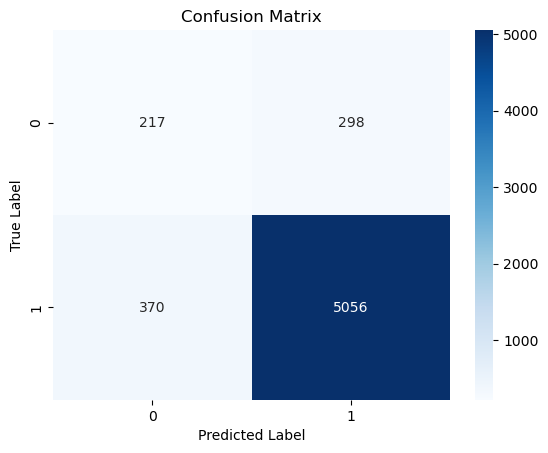

In [76]:
cm = confusion_matrix(y_te, y_pr)

sns.heatmap(cm, annot=True, cmap='Blues', fmt = 'd', cbar=True, xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [83]:
rf = RandomForestClassifier(class_weight={0:10.0, 1:1.0})

params = {'n_estimators': randint(10,100),
          'criterion': ['gini', 'entropy'],
          'max_depth': randint(5,15),
         'max_features': ['sqrt','log2'],
         }


cv = RandomizedSearchCV(rf, param_distributions=params, n_iter=10, \
                       cv = 3, verbose=3, scoring = ['precision','recall','f1'], refit=False)

cv.fit(X_tr_vec, y_tr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=28; f1: (test=0.909) precision: (test=0.946) recall: (test=0.875) total time=   6.5s
[CV 2/3] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=28; f1: (test=0.911) precision: (test=0.935) recall: (test=0.887) total time=   7.2s
[CV 3/3] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=28; f1: (test=0.941) precision: (test=0.930) recall: (test=0.952) total time=   5.5s
[CV 1/3] END criterion=gini, max_depth=12, max_features=log2, n_estimators=18; f1: (test=0.952) precision: (test=0.915) recall: (test=0.992) total time=   2.7s
[CV 2/3] END criterion=gini, max_depth=12, max_features=log2, n_estimators=18; f1: (test=0.953) precision: (test=0.918) recall: (test=0.991) total time=   0.8s
[CV 3/3] END criterion=gini, max_depth=12, max_features=log2, n_estimators=18; f1: (test=0.951) precision: (test=0.914) recall: (test=0.989) t

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [97]:
pd.set_option('display.max_columns', None)

rf_cvdf = pd.DataFrame(cv.cv_results_).sort_values(by='rank_test_f1').reset_index(drop=True)
rf_best = pd.DataFrame(rf_cvdf.iloc[0,:])
display(rf_cvdf)
display(rf_best)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,1.308179,0.217772,0.184036,0.028069,entropy,5,log2,57,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.914238,0.914980,0.913930,0.914382,0.000441,10,0.999816,0.999631,1.000000,0.999816,0.000150,1,0.955114,0.955434,0.955029,0.955192,0.000174,1
1,2.607995,0.559407,0.380370,0.060535,entropy,6,log2,29,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.916638,0.917573,0.914810,0.916341,0.001147,8,0.992814,0.995024,0.991522,0.993120,0.001446,2,0.953207,0.954730,0.951623,0.953187,0.001269,2
2,1.902558,0.785276,0.083294,0.012778,gini,12,log2,18,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.915053,0.918231,0.914495,0.915926,0.001646,9,0.992445,0.991338,0.989495,0.991093,0.001217,3,0.952179,0.953385,0.950518,0.952027,0.001176,3
3,11.563911,2.704586,0.372242,0.170225,entropy,8,sqrt,39,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.923130,0.940299,0.932883,0.932104,0.007031,6,0.982495,0.940472,0.942683,0.955217,0.019310,4,0.951888,0.940385,0.937758,0.943344,0.006136,4
4,28.085477,4.731450,0.283872,0.078347,gini,14,sqrt,47,"{'criterion': 'gini', 'max_depth': 14, 'max_fe...",0.939518,0.932075,0.934102,0.935232,0.003142,5,0.927400,0.955953,0.956137,0.946497,0.013504,6,0.933420,0.943863,0.944991,0.940758,0.005209,5
5,7.175259,2.002239,0.088706,0.002945,entropy,12,sqrt,24,"{'criterion': 'entropy', 'max_depth': 12, 'max...",0.933983,0.922384,0.930919,0.929095,0.004908,7,0.954118,0.981202,0.923885,0.953068,0.023411,5,0.943943,0.950884,0.927389,0.940739,0.009856,6
6,19.273308,1.192171,0.239411,0.042988,entropy,12,sqrt,60,"{'criterion': 'entropy', 'max_depth': 12, 'max...",0.947913,0.933108,0.933286,0.938102,0.006937,1,0.895338,0.966642,0.969407,0.943796,0.034283,7,0.920876,0.949579,0.951003,0.940486,0.013879,7
7,12.165581,2.729445,0.186545,0.069916,gini,9,sqrt,33,"{'criterion': 'gini', 'max_depth': 9, 'max_fea...",0.929168,0.941873,0.936697,0.935913,0.005216,4,0.942694,0.937707,0.940840,0.940414,0.002058,8,0.935882,0.939786,0.938764,0.938144,0.001653,8
8,14.322800,1.958877,0.304014,0.246772,entropy,12,sqrt,42,"{'criterion': 'entropy', 'max_depth': 12, 'max...",0.935377,0.946700,0.930894,0.937657,0.006651,2,0.938824,0.906745,0.965721,0.937097,0.024108,9,0.937098,0.926292,0.947987,0.937126,0.008857,9
9,6.362544,0.702424,0.124646,0.017773,gini,9,sqrt,28,"{'criterion': 'gini', 'max_depth': 9, 'max_fea...",0.946204,0.935290,0.930115,0.937203,0.006706,3,0.875069,0.887025,0.951714,0.904603,0.033668,10,0.909248,0.910518,0.940791,0.920186,0.014579,10


,0
mean_fit_time,1.308179
std_fit_time,0.217772
mean_score_time,0.184036
std_score_time,0.028069
param_criterion,entropy
param_max_depth,5
param_max_features,log2
param_n_estimators,57
params,"{'criterion': 'entropy', 'max_depth': 5, 'max_..."
split0_test_precision,0.914238


              precision    recall  f1-score   support

           0       0.75      0.02      0.05       515
           1       0.92      1.00      0.96      5426

    accuracy                           0.91      5941
   macro avg       0.83      0.51      0.50      5941
weighted avg       0.90      0.91      0.88      5941



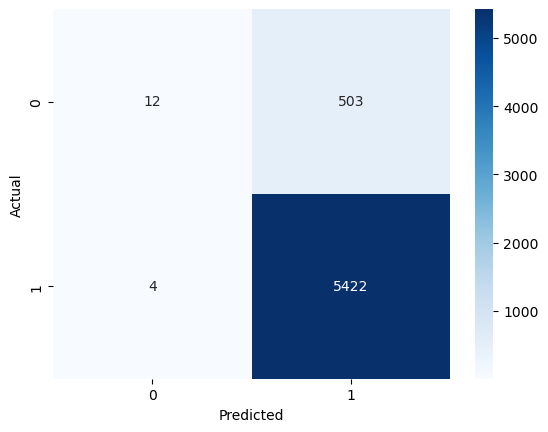

In [122]:
best_rf = RandomForestClassifier(class_weight={0:10.0, 1:1.0}, criterion= 'entropy', max_depth= 5, \
                                 max_features= 'log2', n_estimators= 57)

best_rf.fit(X_tr_vec, y_tr)
y_pr = best_rf.predict(X_te_vec)

print(classification_report(y_te, y_pr))
sns.heatmap(confusion_matrix(y_te, y_pr), cmap='Blues', cbar=True, annot=True, xticklabels= True, yticklabels=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

### Best RF model: class_weight={0:10.0, 1:1.0}, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 57

In [163]:
lgbm = lgb.LGBMClassifier(objective='binary', class_weight={0: 5.0, 1: 1.0}, n_estimators=500)

lgbm.fit(X_tr_vec, y_tr)

y_pr = lgbm.predict(X_te_vec)

[LightGBM] [Info] Number of positive: 16279, number of negative: 1544
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.328603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40627
[LightGBM] [Info] Number of data points in the train set: 17823, number of used features: 1999
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678320 -> initscore=0.746062
[LightGBM] [Info] Start training from score 0.746062


              precision    recall  f1-score   support

           0       0.56      0.60      0.58       515
           1       0.96      0.96      0.96      5426

    accuracy                           0.92      5941
   macro avg       0.76      0.78      0.77      5941
weighted avg       0.93      0.92      0.93      5941



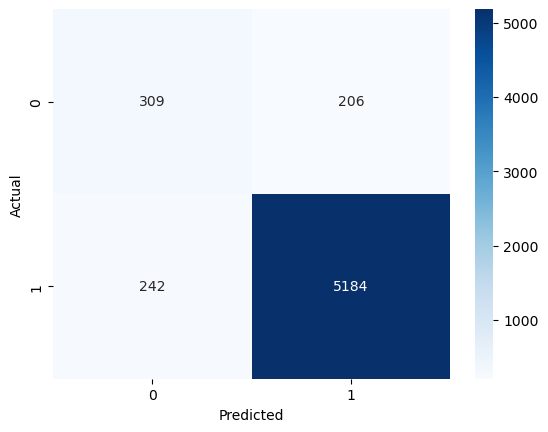

In [137]:
print(classification_report(y_te, y_pr))
sns.heatmap(confusion_matrix(y_te, y_pr), cmap='Blues', cbar=True, annot=True, xticklabels= True, yticklabels=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [147]:
lgbm = lgb.LGBMClassifier(objective='binary')

lgb_cv = RandomizedSearchCV(lgbm, {'class_weight':['balanced', {0: 1.0, 1: 1.0}, {0: 5.0, 1: 1.0}, {0: 1.0, 1: 1.0}, {0: 10.0, 1: 1.0}],
                            'n_estimators': randint(50,500)},\
                            n_iter=10, cv = 3, verbose=3, \
                            scoring = ['precision','recall','f1'], refit=False)

lgb_cv.fit(X_tr_vec, y_tr)   

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 10852, number of negative: 1030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.137540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27949
[LightGBM] [Info] Number of data points in the train set: 11882, number of used features: 1174
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 1/3] END class_weight=balanced, n_estimators=66; f1: (test=0.919) precision: (test=0.976) recall: (test=0.868) total time=   5.5s
[LightGBM] [Info] Number of positive: 10853, number of negative: 1029
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.124740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Inf

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.121066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27949
[LightGBM] [Info] Number of data points in the train set: 11882, number of used features: 1174
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678165 -> initscore=0.745353
[LightGBM] [Info] Start training from score 0.745353
[CV 1/3] END class_weight={0: 5.0, 1: 1.0}, n_estimators=381; f1: (test=0.955) precision: (test=0.958) recall: (test=0.952) total time=  13.4s
[LightGBM] [Info] Number of positive: 10853, number of negative: 1029
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.110685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27569
[LightGBM] [Info] Number of data point

[LightGBM] [Info] Number of positive: 10852, number of negative: 1030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27949
[LightGBM] [Info] Number of data points in the train set: 11882, number of used features: 1174
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 1/3] END class_weight=balanced, n_estimators=112; f1: (test=0.929) precision: (test=0.973) recall: (test=0.889) total time=   5.3s
[LightGBM] [Info] Number of positive: 10853, number of negative: 1029
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.192337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27569
[LightGBM] [Info] Number of data points 

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(objective='binary'),
                   param_distributions={'class_weight': ['balanced',
                                                         {0: 1.0, 1: 1.0},
                                                         {0: 5.0, 1: 1.0},
                                                         {0: 1.0, 1: 1.0},
                                                         {0: 10.0, 1: 1.0}],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001858A71BB90>},
                   refit=False, scoring=['precision', 'recall', 'f1'],
                   verbose=3)

In [150]:
lgbm_cvdf = pd.DataFrame(lgb_cv.cv_results_).sort_values(by='rank_test_f1').reset_index(drop=True)
lgbm_best = pd.DataFrame(lgbm_cvdf.iloc[0,:])
display(lgbm_cvdf)
display(lgbm_best)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_n_estimators,params,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,13.408356,0.773538,0.953348,0.031670,"{0: 5.0, 1: 1.0}",460,"{'class_weight': {0: 5.0, 1: 1.0}, 'n_estimato...",0.955298,0.958085,0.959033,0.957472,0.001585,10,0.956882,0.947844,0.957796,0.954174,0.004492,1,0.956089,0.952937,0.958414,0.955813,0.002245,1
1,12.720309,0.909609,0.827274,0.063750,"{0: 5.0, 1: 1.0}",409,"{'class_weight': {0: 5.0, 1: 1.0}, 'n_estimato...",0.956819,0.958925,0.959157,0.958300,0.001052,9,0.955408,0.946554,0.956506,0.952822,0.004455,2,0.956113,0.952699,0.957830,0.955547,0.002132,2
2,11.513864,0.853734,0.747392,0.029642,"{0: 5.0, 1: 1.0}",381,"{'class_weight': {0: 5.0, 1: 1.0}, 'n_estimato...",0.957545,0.959753,0.959459,0.958919,0.000979,8,0.951723,0.944895,0.955216,0.950611,0.004286,3,0.954625,0.952266,0.957333,0.954741,0.002070,3
3,10.077706,1.299400,0.728233,0.207451,"{0: 5.0, 1: 1.0}",282,"{'class_weight': {0: 5.0, 1: 1.0}, 'n_estimato...",0.959588,0.961669,0.963463,0.961573,0.001583,7,0.945089,0.938629,0.947659,0.943793,0.003799,4,0.952284,0.950009,0.955496,0.952596,0.002251,4
4,8.023707,1.039626,0.337143,0.005560,"{0: 5.0, 1: 1.0}",145,"{'class_weight': {0: 5.0, 1: 1.0}, 'n_estimato...",0.964374,0.966647,0.966997,0.966006,0.001163,4,0.932744,0.924069,0.934206,0.930340,0.004474,6,0.948295,0.944879,0.950319,0.947831,0.002245,5
5,10.696121,0.353304,0.667800,0.014865,balanced,388,"{'class_weight': 'balanced', 'n_estimators': 388}",0.960516,0.964416,0.965169,0.963367,0.002039,6,0.932375,0.924069,0.934574,0.930340,0.004524,5,0.946237,0.943812,0.949625,0.946558,0.002384,6
6,10.755256,1.178632,0.662893,0.068948,balanced,319,"{'class_weight': 'balanced', 'n_estimators': 319}",0.961649,0.966105,0.966520,0.964758,0.002205,5,0.928690,0.919278,0.931073,0.926347,0.005092,7,0.944882,0.942110,0.948465,0.945152,0.002602,7
7,5.837220,0.732855,0.221988,0.014651,"{0: 5.0, 1: 1.0}",80,"{'class_weight': {0: 5.0, 1: 1.0}, 'n_estimato...",0.967516,0.972731,0.971006,0.970418,0.002169,3,0.916528,0.900663,0.919646,0.912279,0.008312,8,0.941332,0.935311,0.944628,0.940424,0.003858,8
8,5.882831,0.674751,0.238767,0.036211,balanced,112,"{'class_weight': 'balanced', 'n_estimators': 112}",0.973376,0.975896,0.973854,0.974375,0.001093,2,0.889257,0.873019,0.892370,0.884882,0.008484,9,0.929417,0.921595,0.931333,0.927449,0.004212,9
9,5.054953,0.531393,0.164447,0.035959,balanced,66,"{'class_weight': 'balanced', 'n_estimators': 66}",0.976176,0.978814,0.978351,0.977780,0.001150,1,0.868251,0.851456,0.874493,0.864733,0.009728,10,0.919056,0.910704,0.923511,0.917757,0.005309,10


,0
mean_fit_time,13.408356
std_fit_time,0.773538
mean_score_time,0.953348
std_score_time,0.03167
param_class_weight,"{0: 5.0, 1: 1.0}"
param_n_estimators,460
params,"{'class_weight': {0: 5.0, 1: 1.0}, 'n_estimato..."
split0_test_precision,0.955298
split1_test_precision,0.958085
split2_test_precision,0.959033


In [160]:
pd.set_option('display.max_colwidth', None)
print(lgbm_best.loc[['params', 'mean_test_precision','mean_test_recall','mean_test_f1'],:])

                                                                           0
params               {'class_weight': {0: 5.0, 1: 1.0}, 'n_estimators': 460}
mean_test_precision                                                 0.957472
mean_test_recall                                                    0.954174
mean_test_f1                                                        0.955813


In [168]:
svc = LinearSVC(class_weight='balanced', max_iter=5000)

svc.fit(X_tr_vec, y_tr)

y_pr = svc.predict(X_te_vec)

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.45      0.56      0.50       515
           1       0.96      0.94      0.95      5426

    accuracy                           0.90      5941
   macro avg       0.70      0.75      0.72      5941
weighted avg       0.91      0.90      0.91      5941



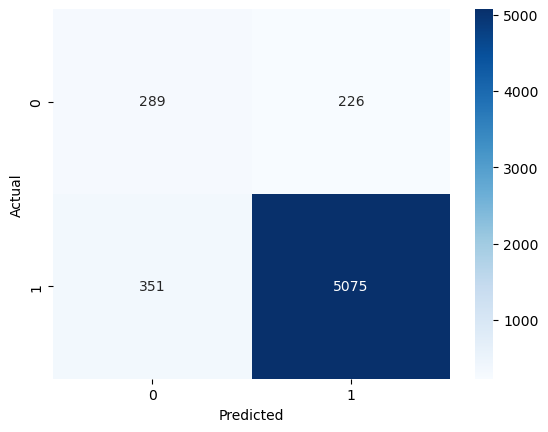

In [169]:
print(classification_report(y_te, y_pr))
sns.heatmap(confusion_matrix(y_te, y_pr), cmap='Blues', cbar=True, annot=True, xticklabels= True, yticklabels=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [179]:
svc = LinearSVC(dual='auto')

svc_cv = GridSearchCV(svc, {'class_weight':['balanced', {0: 1.0, 1: 1.0}, {0: 5.0, 1: 1.0}, {0: 1.0, 1: 1.0}, {0: 10.0, 1: 1.0}],
                           'max_iter': [1000,2500,5000],
                           'C':[0.1, 1, 10.0]},
                           cv = 3, verbose=3, \
                            scoring = ['precision','recall','f1'], refit=False)

svc_cv.fit(X_tr_vec, y_tr)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END C=0.1, class_weight=balanced, max_iter=1000; f1: (test=0.916) precision: (test=0.973) recall: (test=0.866) total time=   0.4s
[CV 2/3] END C=0.1, class_weight=balanced, max_iter=1000; f1: (test=0.901) precision: (test=0.977) recall: (test=0.837) total time=   0.9s
[CV 3/3] END C=0.1, class_weight=balanced, max_iter=1000; f1: (test=0.921) precision: (test=0.975) recall: (test=0.873) total time=   0.6s
[CV 1/3] END C=0.1, class_weight=balanced, max_iter=2500; f1: (test=0.916) precision: (test=0.973) recall: (test=0.866) total time=   0.4s
[CV 2/3] END C=0.1, class_weight=balanced, max_iter=2500; f1: (test=0.901) precision: (test=0.977) recall: (test=0.837) total time=   0.5s
[CV 3/3] END C=0.1, class_weight=balanced, max_iter=2500; f1: (test=0.921) precision: (test=0.975) recall: (test=0.873) total time=   0.5s
[CV 1/3] END C=0.1, class_weight=balanced, max_iter=5000; f1: (test=0.916) precision: (test=0.973) recal

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=1, class_weight=balanced, max_iter=1000; f1: (test=0.952) precision: (test=0.949) recall: (test=0.955) total time=   2.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=1, class_weight=balanced, max_iter=1000; f1: (test=0.952) precision: (test=0.951) recall: (test=0.953) total time=   2.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=1, class_weight=balanced, max_iter=1000; f1: (test=0.951) precision: (test=0.952) recall: (test=0.950) total time=   2.4s
[CV 1/3] END C=1, class_weight=balanced, max_iter=2500; f1: (test=0.952) precision: (test=0.949) recall: (test=0.955) total time=   2.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=1, class_weight=balanced, max_iter=2500; f1: (test=0.952) precision: (test=0.951) recall: (test=0.953) total time=   5.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=1, class_weight=balanced, max_iter=2500; f1: (test=0.951) precision: (test=0.952) recall: (test=0.950) total time=   5.1s
[CV 1/3] END C=1, class_weight=balanced, max_iter=5000; f1: (test=0.952) precision: (test=0.949) recall: (test=0.955) total time=   1.6s
[CV 2/3] END C=1, class_weight=balanced, max_iter=5000; f1: (test=0.952) precision: (test=0.951) recall: (test=0.953) total time=   5.4s
[CV 3/3] END C=1, class_weight=balanced, max_iter=5000; f1: (test=0.951) precision: (test=0.952) recall: (test=0.950) total time=   7.4s
[CV 1/3] END C=1, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.965) precision: (test=0.941) recall: (test=0.991) total time=   1.5s
[CV 2/3] END C=1, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.966) precision: (test=0.942) recall: (test=0.992) total time=   2.4s
[CV 3/3] END C=1, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.965) precision: (test=0.941) recall: (test=0.991) total time=   1.9s
[CV 1/3] END C=1,

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=1000; f1: (test=0.957) precision: (test=0.946) recall: (test=0.968) total time=   1.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=1000; f1: (test=0.958) precision: (test=0.948) recall: (test=0.967) total time=   1.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=1000; f1: (test=0.956) precision: (test=0.948) recall: (test=0.965) total time=   2.0s
[CV 1/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=2500; f1: (test=0.957) precision: (test=0.946) recall: (test=0.968) total time=   1.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=2500; f1: (test=0.958) precision: (test=0.948) recall: (test=0.968) total time=   4.4s
[CV 3/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=2500; f1: (test=0.956) precision: (test=0.948) recall: (test=0.965) total time=   3.7s
[CV 1/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=5000; f1: (test=0.957) precision: (test=0.946) recall: (test=0.968) total time=   2.4s
[CV 2/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=5000; f1: (test=0.958) precision: (test=0.948) recall: (test=0.968) total time=   8.1s
[CV 3/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=5000; f1: (test=0.956) precision: (test=0.948) recall: (test=0.965) total time=   4.7s
[CV 1/3] END C=1, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.965) precision: (test=0.941) recall: (test=0.991) total time=   0.9s
[CV 2/3] END C=1, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.966) precision: (test=0.942) recall: (test=0.992) tota

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=1000; f1: (test=0.953) precision: (test=0.948) recall: (test=0.958) total time=   1.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=1000; f1: (test=0.952) precision: (test=0.948) recall: (test=0.957) total time=   2.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=1000; f1: (test=0.951) precision: (test=0.949) recall: (test=0.953) total time=   2.6s
[CV 1/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=2500; f1: (test=0.953) precision: (test=0.948) recall: (test=0.958) total time=   6.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=2500; f1: (test=0.952) precision: (test=0.948) recall: (test=0.956) total time=   9.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=2500; f1: (test=0.951) precision: (test=0.949) recall: (test=0.953) total time=   4.4s
[CV 1/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=5000; f1: (test=0.953) precision: (test=0.948) recall: (test=0.958) total time=   2.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=5000; f1: (test=0.952) precision: (test=0.948) recall: (test=0.956) total time=  11.6s
[CV 3/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=5000; f1: (test=0.951) precision: (test=0.949) recall: (test=0.953) total time=  10.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight=balanced, max_iter=1000; f1: (test=0.949) precision: (test=0.945) recall: (test=0.952) total time=   2.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight=balanced, max_iter=1000; f1: (test=0.952) precision: (test=0.947) recall: (test=0.957) total time=   2.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight=balanced, max_iter=1000; f1: (test=0.952) precision: (test=0.950) recall: (test=0.955) total time=   2.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight=balanced, max_iter=2500; f1: (test=0.948) precision: (test=0.946) recall: (test=0.950) total time=   4.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight=balanced, max_iter=2500; f1: (test=0.951) precision: (test=0.946) recall: (test=0.957) total time=   3.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight=balanced, max_iter=2500; f1: (test=0.952) precision: (test=0.949) recall: (test=0.955) total time=   4.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight=balanced, max_iter=5000; f1: (test=0.948) precision: (test=0.946) recall: (test=0.950) total time=  13.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight=balanced, max_iter=5000; f1: (test=0.951) precision: (test=0.946) recall: (test=0.956) total time=   6.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight=balanced, max_iter=5000; f1: (test=0.952) precision: (test=0.949) recall: (test=0.955) total time=   5.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.962) precision: (test=0.942) recall: (test=0.983) total time=   1.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.962) precision: (test=0.944) recall: (test=0.981) total time=   2.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.962) precision: (test=0.945) recall: (test=0.979) total time=   2.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2500; f1: (test=0.962) precision: (test=0.942) recall: (test=0.983) total time=   5.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2500; f1: (test=0.962) precision: (test=0.944) recall: (test=0.981) total time=   5.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2500; f1: (test=0.962) precision: (test=0.945) recall: (test=0.979) total time=   4.7s
[CV 1/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=5000; f1: (test=0.962) precision: (test=0.942) recall: (test=0.983) total time=   6.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=5000; f1: (test=0.962) precision: (test=0.944) recall: (test=0.981) total time=   9.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=5000; f1: (test=0.962) precision: (test=0.945) recall: (test=0.979) total time=   9.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=1000; f1: (test=0.950) precision: (test=0.944) recall: (test=0.956) total time=   2.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=1000; f1: (test=0.955) precision: (test=0.947) recall: (test=0.963) total time=   2.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=1000; f1: (test=0.954) precision: (test=0.948) recall: (test=0.960) total time=   3.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=2500; f1: (test=0.949) precision: (test=0.944) recall: (test=0.954) total time=   8.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=2500; f1: (test=0.955) precision: (test=0.947) recall: (test=0.963) total time=   7.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=2500; f1: (test=0.954) precision: (test=0.948) recall: (test=0.960) total time=   8.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=5000; f1: (test=0.949) precision: (test=0.944) recall: (test=0.954) total time=  10.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=5000; f1: (test=0.954) precision: (test=0.947) recall: (test=0.962) total time=   5.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=5000; f1: (test=0.954) precision: (test=0.948) recall: (test=0.960) total time=   7.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.962) precision: (test=0.942) recall: (test=0.983) total time=   2.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.962) precision: (test=0.944) recall: (test=0.981) total time=   2.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.962) precision: (test=0.945) recall: (test=0.979) total time=   2.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2500; f1: (test=0.962) precision: (test=0.942) recall: (test=0.983) total time=   5.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2500; f1: (test=0.962) precision: (test=0.944) recall: (test=0.981) total time=   3.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2500; f1: (test=0.962) precision: (test=0.945) recall: (test=0.979) total time=   2.7s
[CV 1/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=5000; f1: (test=0.962) precision: (test=0.942) recall: (test=0.983) total time=   3.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=5000; f1: (test=0.962) precision: (test=0.944) recall: (test=0.981) total time=   5.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=5000; f1: (test=0.962) precision: (test=0.945) recall: (test=0.979) total time=   5.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1000; f1: (test=0.947) precision: (test=0.945) recall: (test=0.949) total time=   1.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1000; f1: (test=0.952) precision: (test=0.947) recall: (test=0.958) total time=   1.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1000; f1: (test=0.951) precision: (test=0.951) recall: (test=0.952) total time=   1.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=2500; f1: (test=0.945) precision: (test=0.945) recall: (test=0.944) total time=   3.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=2500; f1: (test=0.951) precision: (test=0.945) recall: (test=0.956) total time=   3.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=2500; f1: (test=0.951) precision: (test=0.949) recall: (test=0.952) total time=   3.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=5000; f1: (test=0.944) precision: (test=0.945) recall: (test=0.943) total time=   6.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=5000; f1: (test=0.951) precision: (test=0.945) recall: (test=0.956) total time=   6.0s
[CV 3/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=5000; f1: (test=0.951) precision: (test=0.949) recall: (test=0.952) total time=   5.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=3, estimator=LinearSVC(dual='auto'),
             param_grid={'C': [0.1, 1, 10.0],
                         'class_weight': ['balanced', {0: 1.0, 1: 1.0},
                                          {0: 5.0, 1: 1.0}, {0: 1.0, 1: 1.0},
                                          {0: 10.0, 1: 1.0}],
                         'max_iter': [1000, 2500, 5000]},
             refit=False, scoring=['precision', 'recall', 'f1'], verbose=3)

In [180]:
svc_cvdf = pd.DataFrame(svc_cv.cv_results_).sort_values(by='rank_test_f1').reset_index(drop=True)
svc_best = pd.DataFrame(svc_cvdf.iloc[0,:])
display(svc_cvdf)
display(svc_best)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_max_iter,params,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,2.017925,0.359134,0.016367,0.007963,1,"{0: 1.0, 1: 1.0}",1000,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 1000}",0.941043,0.941557,0.940507,0.941036,0.000429,34,0.991155,0.991707,0.990601,0.991154,0.000451,7,0.965449,0.965982,0.964904,0.965445,0.000440,1
1,1.045039,0.058741,0.012817,0.001324,1,"{0: 1.0, 1: 1.0}",1000,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 1000}",0.941043,0.941557,0.940507,0.941036,0.000429,34,0.991155,0.991707,0.990601,0.991154,0.000451,7,0.965449,0.965982,0.964904,0.965445,0.000440,1
2,0.906880,0.150823,0.015623,0.000002,1,"{0: 1.0, 1: 1.0}",2500,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 2500}",0.941043,0.941557,0.940507,0.941036,0.000429,34,0.991155,0.991707,0.990601,0.991154,0.000451,7,0.965449,0.965982,0.964904,0.965445,0.000440,1
3,0.877124,0.215718,0.002019,0.002855,1,"{0: 1.0, 1: 1.0}",5000,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 5000}",0.941043,0.941557,0.940507,0.941036,0.000429,34,0.991155,0.991707,0.990601,0.991154,0.000451,7,0.965449,0.965982,0.964904,0.965445,0.000440,1
4,1.185640,0.398609,0.014978,0.000741,1,"{0: 1.0, 1: 1.0}",5000,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 5000}",0.941043,0.941557,0.940507,0.941036,0.000429,34,0.991155,0.991707,0.990601,0.991154,0.000451,7,0.965449,0.965982,0.964904,0.965445,0.000440,1
5,1.876595,0.375678,0.016896,0.004938,1,"{0: 1.0, 1: 1.0}",2500,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 2500}",0.941043,0.941557,0.940507,0.941036,0.000429,34,0.991155,0.991707,0.990601,0.991154,0.000451,7,0.965449,0.965982,0.964904,0.965445,0.000440,1
6,0.141493,0.014667,0.010427,0.007373,0.1,"{0: 1.0, 1: 1.0}",2500,"{'C': 0.1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 2500}",0.935211,0.932358,0.933287,0.933619,0.001188,40,0.997420,0.998341,0.997788,0.997850,0.000379,1,0.965314,0.964222,0.964461,0.964666,0.000469,7
7,0.121098,0.008291,0.015624,0.000002,0.1,"{0: 1.0, 1: 1.0}",1000,"{'C': 0.1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 1000}",0.935211,0.932358,0.933287,0.933619,0.001188,40,0.997420,0.998341,0.997788,0.997850,0.000379,1,0.965314,0.964222,0.964461,0.964666,0.000469,7
8,0.174960,0.036263,0.013825,0.014432,0.1,"{0: 1.0, 1: 1.0}",2500,"{'C': 0.1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 2500}",0.935211,0.932358,0.933287,0.933619,0.001188,40,0.997420,0.998341,0.997788,0.997850,0.000379,1,0.965314,0.964222,0.964461,0.964666,0.000469,7
9,0.167871,0.022609,0.015038,0.003149,0.1,"{0: 1.0, 1: 1.0}",5000,"{'C': 0.1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 5000}",0.935211,0.932358,0.933287,0.933619,0.001188,40,0.997420,0.998341,0.997788,0.997850,0.000379,1,0.965314,0.964222,0.964461,0.964666,0.000469,7


,0
mean_fit_time,2.017925
std_fit_time,0.359134
mean_score_time,0.016367
std_score_time,0.007963
param_C,1
param_class_weight,"{0: 1.0, 1: 1.0}"
param_max_iter,1000
params,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 1000}"
split0_test_precision,0.941043
split1_test_precision,0.941557
